# Task lab work # 4

# Yuliia Shevchenko
# CS32
# Dataset 3

### The task contains 2 parts:
1. Play with [Tensorflow Playground](https://playground.tensorflow.org) and save a bunch of screenshots (at least 10).
2. Solve the classification problem on your dataset from the Lab #2: play with number of neurons, function activation and learning rate (and if you wish play with learning rate schedule)

# Task1

### Скриншот 1: 2 шари, tanh, LR 0.03


![Скриншот 1](1.png)

### Скриншот 2: Модель з високим шумом



![Скриншот 2](2.png)

### Скриншот 3: Перенавчена модель


![Скриншот 3](3.png)

### Скриншот 4: Недонавчена модель


![Скриншот 4](4.png)

### Скриншот 5: Регуляризація L2

![Скриншот 5](5.png)

### Скриншот 6: Регуляризація L1

![Скриншот 6](6.png)

### Скриншот 7: Висока швидкість навчання

![Скриншот 7](7.png)

### Скриншот 8: Низька швидкість навчання


![Скриншот 8](8.png)

### Скриншот 9: Комбіновані ознаки

![Скриншот 9](9.png)

### Скриншот 10: Велика мережа з регуляризацією

![Скриншот 10](10.png)

## Task 2

In [1]:
#!pip install tensorflow

# Import dependencies

In [2]:
import pandas as pd
import numpy as np

# importing utils
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# importing drawing tools
import matplotlib.pyplot as plt

# importing NN wrapper lib
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# Load data


In [3]:
dataset = pd.read_csv("../lab_3/glass.csv")
dataset

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [4]:
x_data = dataset.select_dtypes(include=['float64'])

print(f"x_data MEAN:\n{x_data.mean()}\n")
print(f"x_data STD:\n{x_data.std()}")

x_data MEAN:
RI     1.518365
Na    13.407850
Mg     2.684533
Al     1.444907
Si    72.650935
K      0.497056
Ca     8.956963
Ba     0.175047
Fe     0.057009
dtype: float64

x_data STD:
RI    0.003037
Na    0.816604
Mg    1.442408
Al    0.499270
Si    0.774546
K     0.652192
Ca    1.423153
Ba    0.497219
Fe    0.097439
dtype: float64


In [5]:
"""for col_name in x_data.columns:
     scaler = StandardScaler()

     scaler.fit([x_data[col_name].to_numpy(), ])
     x_data[col_name] = list(scaler.transform([x_data[col_name].to_numpy(), ])[0])


print(f"x_data MEAN:\n{x_data.mean()}\n")
print(f"x_data STD:\n{x_data.std()}")"""

'for col_name in x_data.columns:\n     scaler = StandardScaler()\n\n     scaler.fit([x_data[col_name].to_numpy(), ])\n     x_data[col_name] = list(scaler.transform([x_data[col_name].to_numpy(), ])[0])\n\n\nprint(f"x_data MEAN:\n{x_data.mean()}\n")\nprint(f"x_data STD:\n{x_data.std()}")'

In [6]:
# Normalize the data
x_data -= x_data.mean(axis=0)
x_data /= x_data.std(axis=0)

print(f"x_data MEAN:\n{x_data.mean()}\n")
print(f"x_data STD:\n{x_data.std()}")

x_data MEAN:
RI   -2.870393e-14
Na    2.141589e-15
Mg   -1.992176e-16
Al   -2.988264e-16
Si    9.504339e-16
K     4.772921e-17
Ca   -3.154278e-16
Ba   -3.320293e-17
Fe   -4.565403e-17
dtype: float64

x_data STD:
RI    1.0
Na    1.0
Mg    1.0
Al    1.0
Si    1.0
K     1.0
Ca    1.0
Ba    1.0
Fe    1.0
dtype: float64


In [7]:
x_data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.870826,0.284287,1.251704,-0.690822,-1.124446,-0.670134,-0.145425,-0.352051,-0.585079
1,-0.248750,0.590433,0.634680,-0.170061,0.102080,-0.026152,-0.791877,-0.352051,-0.585079
2,-0.719631,0.149582,0.600016,0.190465,0.437760,-0.164148,-0.827010,-0.352051,-0.585079
3,-0.232286,-0.242285,0.697076,-0.310266,-0.052850,0.111844,-0.517838,-0.352051,-0.585079
4,-0.311315,-0.168810,0.648546,-0.410413,0.553957,0.081178,-0.623237,-0.352051,-0.585079


In [8]:
x_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
dtypes: float64(9)
memory usage: 15.2 KB


In [9]:
dataset['glass_group'] = dataset['Type'] - 1

In [10]:
y = to_categorical(dataset['glass_group'], num_classes=7)

In [11]:
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y, test_size=0.2, random_state=42)
all_metrics = {}

# Train try #1
1 layer + softmax activation (which is mandatory for multiclass classification)

In [13]:
model = Sequential([
    Input(shape=(x_train.shape[1], )),
    Dense(7, activation='softmax')
])


In [14]:
def compile_and_train_model(model, x_train, y_train, x_test, y_test,
                            initial_lr=0.001, batch_size=25, epochs=100):
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=initial_lr,
        decay_steps=100,
        decay_rate=1.0
    )
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

    model.compile(
        optimizer=optimizer,
        loss="categorical_crossentropy",
        metrics=["accuracy", "f1_score"]
    )

    stat = model.fit(
        x_train, y_train,
        validation_data=(x_test, y_test),
        batch_size=batch_size,
        epochs=epochs
    )
    return model, stat.history

def visualize_model(history):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(history['accuracy'])
    plt.plot(history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.show()

    return model, history

In [15]:
def save_metrics(model_index, history):
    return {
        f'model_{model_index}': {
            'train_loss': history['loss'],
            'val_loss': history['val_loss'],
            'train_accuracy': history['accuracy'],
            'val_accuracy': history['val_accuracy'],
            'train_f1_score': history.get('f1_score', []),
            'val_f1_score': history.get('val_f1_score', [])
        }
    }



In [16]:
model, history = compile_and_train_model(model, x_train, y_train, x_test, y_test, initial_lr=0.3)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.2739 - f1_score: 0.1808 - loss: 2.0514 - val_accuracy: 0.6047 - val_f1_score: 0.4695 - val_loss: 0.9518
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5899 - f1_score: 0.3614 - loss: 1.0825 - val_accuracy: 0.7209 - val_f1_score: 0.5326 - val_loss: 0.8006
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6177 - f1_score: 0.5077 - loss: 0.9591 - val_accuracy: 0.5814 - val_f1_score: 0.4755 - val_loss: 0.7824
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5892 - f1_score: 0.5136 - loss: 1.0301 - val_accuracy: 0.7674 - val_f1_score: 0.5724 - val_loss: 0.6442
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5833 - f1_score: 0.4806 - loss: 0.8822 - val_accuracy: 0.7674 - val_f1_score: 0.5805 - val_loss: 0.7398
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6539 - f1_score: 0.5132 - loss: 0.8571 - val_accuracy: 0.6279 - val_f1_score: 0.5119 - val_loss:

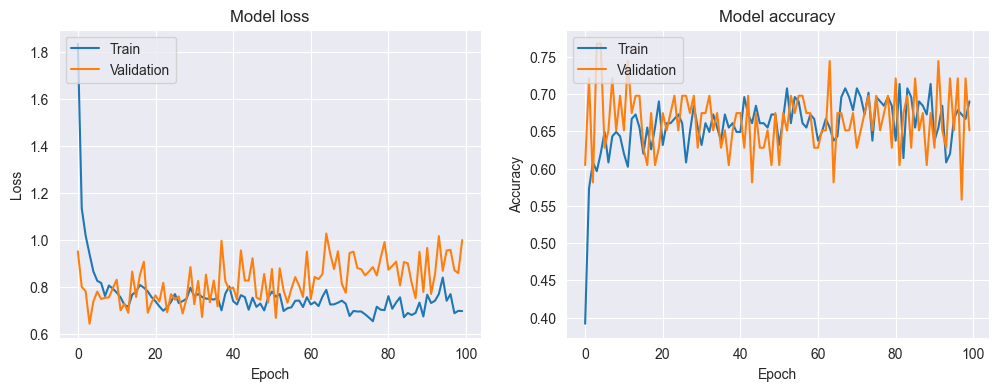

In [17]:
visualize_model(history)
metrics = save_metrics(0, history)
all_metrics.update(metrics)

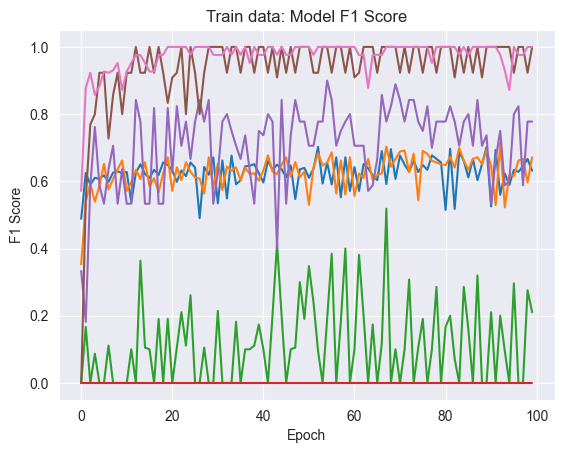

In [18]:
plt.plot([float(x[0]) for x in  history['f1_score']])
plt.plot([float(x[1]) for x in  history['f1_score']])
plt.plot([float(x[2]) for x in  history['f1_score']])
plt.plot([float(x[3]) for x in history['f1_score']])
plt.plot([float(x[4]) for x in history['f1_score']])
plt.plot([float(x[5]) for x in history['f1_score']])
plt.plot([float(x[6]) for x in history['f1_score']])
plt.title('Train data: Model F1 Score')
plt.ylabel('F1 Score')
plt.xlabel('Epoch')

plt.show()

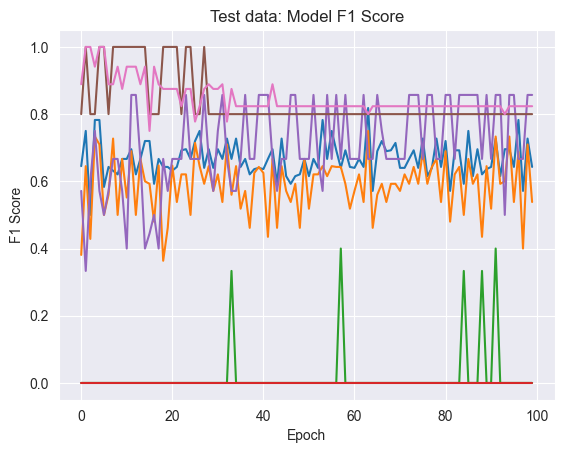

In [19]:
plt.plot([float(x[0]) for x in history['val_f1_score']])
plt.plot([float(x[1]) for x in history['val_f1_score']])
plt.plot([float(x[2]) for x in history['val_f1_score']])
plt.plot([float(x[3]) for x in history['val_f1_score']])
plt.plot([float(x[4]) for x in history['val_f1_score']])
plt.plot([float(x[5]) for x in history['val_f1_score']])
plt.plot([float(x[6]) for x in history['val_f1_score']])
plt.title('Test data: Model F1 Score')
plt.ylabel('F1 Score')
plt.xlabel('Epoch')
plt.show()

# Try 2
lr = 0.1

In [20]:
model = Sequential([
    Input(shape=(x_train.shape[1],)),
    Dense(7, activation='softmax')
])


In [21]:
model, history = compile_and_train_model(model, x_train, y_train, x_test, y_test, initial_lr=0.1)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.2362 - f1_score: 0.1449 - loss: 2.0717 - val_accuracy: 0.6279 - val_f1_score: 0.4872 - val_loss: 0.9933
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5372 - f1_score: 0.3736 - loss: 1.0537 - val_accuracy: 0.6047 - val_f1_score: 0.4501 - val_loss: 0.9009
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5687 - f1_score: 0.3955 - loss: 1.0063 - val_accuracy: 0.6279 - val_f1_score: 0.4943 - val_loss: 0.7599
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6229 - f1_score: 0.3944 - loss: 0.8415 - val_accuracy: 0.7209 - val_f1_score: 0.5676 - val_loss: 0.7004
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6990 - f1_score: 0.5124 - loss: 0.8195 - val_accuracy: 0.7209 - val_f1_score: 0.5641 - val_loss: 0.6784
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6658 - f1_score: 0.5660 - loss: 0.8147 - val_accuracy: 0.7442 - val_f1_score: 0.5944 - val_loss:

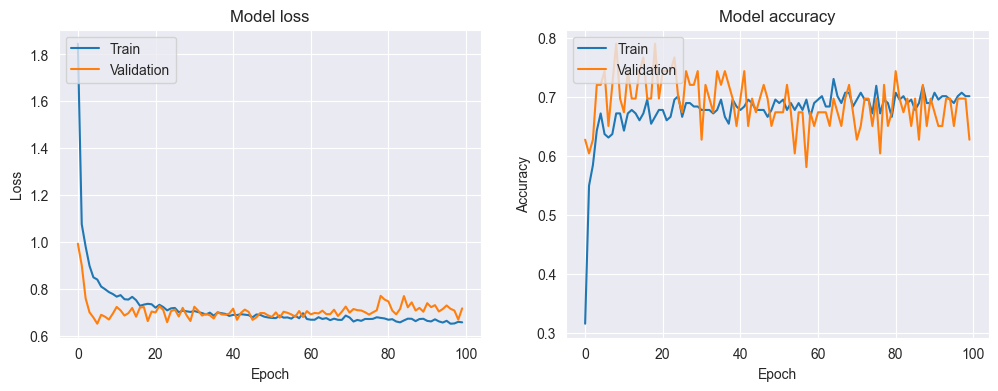

In [22]:
visualize_model(history)
metrics = save_metrics(1, history)
all_metrics.update(metrics)

# Try 3
lr = 0.3

In [24]:
model = Sequential([
    Input(shape=(x_train.shape[1],)),
    Dense(7, activation='softmax')
])


In [25]:
model, history = compile_and_train_model(model, x_train, y_train, x_test, y_test, initial_lr=0.3)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.4290 - f1_score: 0.2420 - loss: 1.7770 - val_accuracy: 0.6977 - val_f1_score: 0.4993 - val_loss: 0.9759
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5685 - f1_score: 0.4135 - loss: 1.0728 - val_accuracy: 0.6744 - val_f1_score: 0.5311 - val_loss: 0.7818
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5716 - f1_score: 0.4479 - loss: 0.9424 - val_accuracy: 0.6279 - val_f1_score: 0.4937 - val_loss: 0.8024
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6208 - f1_score: 0.5136 - loss: 0.8024 - val_accuracy: 0.7209 - val_f1_score: 0.5337 - val_loss: 0.7355
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6431 - f1_score: 0.5271 - loss: 0.7827 - val_accuracy: 0.5814 - val_f1_score: 0.4506 - val_loss: 0.9400
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6066 - f1_score: 0.4652 - loss: 0.8744 - val_accuracy: 0.7442 - val_f1_score: 0.5979 - val_loss:

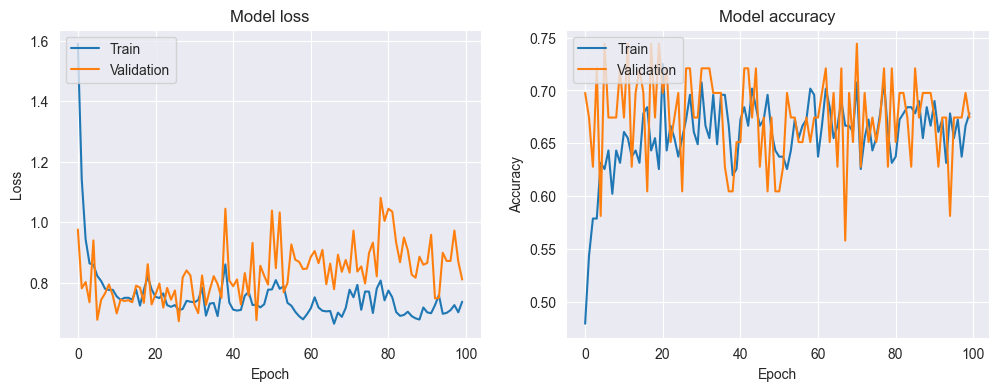

In [26]:
visualize_model(history)
metrics = save_metrics(2, history)
all_metrics.update(metrics)

# Try 4
lr = 0.001

In [28]:
model = Sequential([
    Input(shape=(x_train.shape[1],)),
    Dense(7, activation='softmax')
])


In [29]:
model, history = compile_and_train_model(model, x_train, y_train, x_test, y_test, initial_lr=0.001)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.2151 - f1_score: 0.2043 - loss: 1.9544 - val_accuracy: 0.2558 - val_f1_score: 0.1883 - val_loss: 1.8227
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.2028 - f1_score: 0.1850 - loss: 1.8814 - val_accuracy: 0.3023 - val_f1_score: 0.2259 - val_loss: 1.8031
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.1959 - f1_score: 0.1656 - loss: 1.9809 - val_accuracy: 0.3023 - val_f1_score: 0.2259 - val_loss: 1.7832
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2641 - f1_score: 0.2076 - loss: 1.8938 - val_accuracy: 0.3023 - val_f1_score: 0.2259 - val_loss: 1.7638
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3008 - f1_score: 0.2190 - loss: 1.8160 - val_accuracy: 0.3023 - val_f1_score: 0.2259 - val_loss: 1.7449
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2643 - f1_score: 0.2071 - loss: 1.9218 - val_accuracy: 0.3023 - val_f1_score: 0.2238 - val_loss:

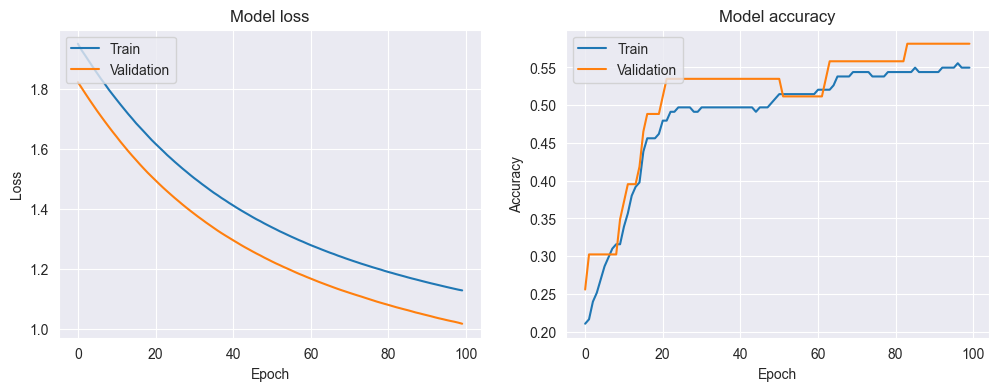

In [30]:
visualize_model(history)
metrics = save_metrics(3, history)
all_metrics.update(metrics)

# Try 5
lr = 0.01

Layer 0: 1 relu
Layer 1: 3 softmax

In [32]:
model = Sequential([
    Input(shape=(x_train.shape[1],)),
    Dense(1, activation='relu'),
    Dense(7, activation='softmax')
])

In [33]:
model, history = compile_and_train_model(model, x_train, y_train, x_test, y_test, initial_lr=0.01)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.3725 - f1_score: 0.1501 - loss: 1.9177 - val_accuracy: 0.2558 - val_f1_score: 0.0582 - val_loss: 1.8840
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3179 - f1_score: 0.0978 - loss: 1.8787 - val_accuracy: 0.2791 - val_f1_score: 0.0942 - val_loss: 1.8100
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3350 - f1_score: 0.1157 - loss: 1.7738 - val_accuracy: 0.3721 - val_f1_score: 0.1965 - val_loss: 1.7369
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3944 - f1_score: 0.2012 - loss: 1.7100 - val_accuracy: 0.4419 - val_f1_score: 0.2232 - val_loss: 1.6675
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4342 - f1_score: 0.2273 - loss: 1.6588 - val_accuracy: 0.4884 - val_f1_score: 0.2352 - val_loss: 1.6030
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3909 - f1_score: 0.2069 - loss: 1.6537 - val_accuracy: 0.4884 - val_f1_score: 0.2340 - val_loss:

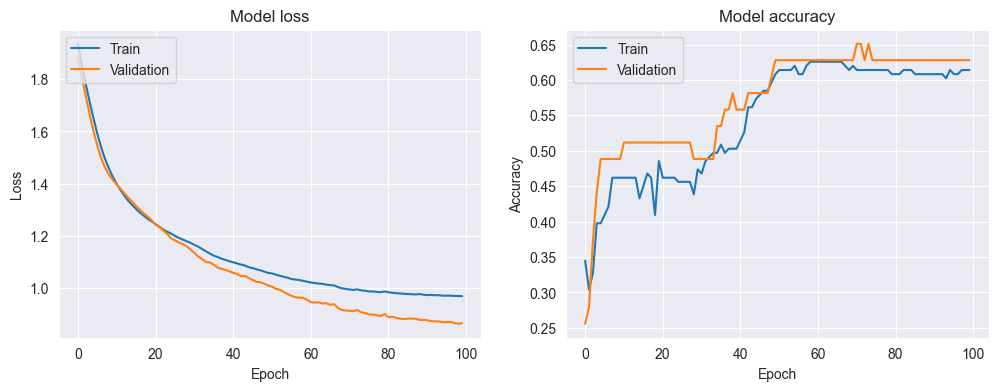

In [34]:
visualize_model(history)
metrics = save_metrics(4, history)
all_metrics.update(metrics)

# Try 6
lr = 0.01

Layer 0: 10 relu
Layer 1: 3 softmax

In [36]:
model = Sequential([
    Input(shape=(x_train.shape[1],)),
    Dense(10, activation='relu'),
    Dense(7, activation='softmax'),
])

In [37]:
model, history = compile_and_train_model(model, x_train, y_train, x_test, y_test, initial_lr=0.01)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.1580 - f1_score: 0.1035 - loss: 1.8999 - val_accuracy: 0.6279 - val_f1_score: 0.3272 - val_loss: 1.6120
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5958 - f1_score: 0.3497 - loss: 1.5165 - val_accuracy: 0.5349 - val_f1_score: 0.3024 - val_loss: 1.3950
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5713 - f1_score: 0.3573 - loss: 1.3579 - val_accuracy: 0.5349 - val_f1_score: 0.3024 - val_loss: 1.2546
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5909 - f1_score: 0.3831 - loss: 1.1865 - val_accuracy: 0.5581 - val_f1_score: 0.3225 - val_loss: 1.1665
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5907 - f1_score: 0.3308 - loss: 1.1748 - val_accuracy: 0.5814 - val_f1_score: 0.3338 - val_loss: 1.0903
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5871 - f1_score: 0.3467 - loss: 1.0886 - val_accuracy: 0.6512 - val_f1_score: 0.3763 - val_loss:

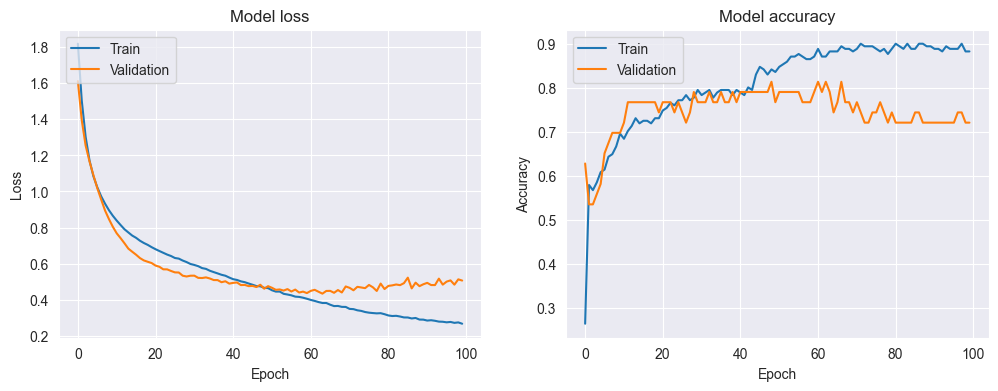

In [38]:
visualize_model(history)
metrics = save_metrics(5, history)
all_metrics.update(metrics)

# Try 7
lr = 0.01

* Layer 0: 100 relu
* Layer 1: 100 relu
* Layer 2: 100 relu
* Layer 3: 100 relu
* Layer 4: 3 softmax

In [40]:
model = Sequential([
    Input(shape=(x_train.shape[1],)),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(7, activation='softmax'),
])

In [41]:
model, history = compile_and_train_model(model, x_train, y_train, x_test, y_test, initial_lr=0.01)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.3571 - f1_score: 0.1645 - loss: 1.6587 - val_accuracy: 0.4651 - val_f1_score: 0.2084 - val_loss: 1.2279
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5783 - f1_score: 0.2650 - loss: 1.0132 - val_accuracy: 0.7674 - val_f1_score: 0.5280 - val_loss: 0.7871
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6437 - f1_score: 0.4549 - loss: 0.8922 - val_accuracy: 0.6744 - val_f1_score: 0.3947 - val_loss: 0.8798
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7257 - f1_score: 0.3792 - loss: 0.7115 - val_accuracy: 0.6744 - val_f1_score: 0.4737 - val_loss: 0.6774
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7265 - f1_score: 0.5495 - loss: 0.6943 - val_accuracy: 0.6744 - val_f1_score: 0.4873 - val_loss: 0.8849
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7512 - f1_score: 0.5776 - loss: 0.6738 - val_accuracy: 0.7209 - val_f1_score: 0.4689 - val_loss:

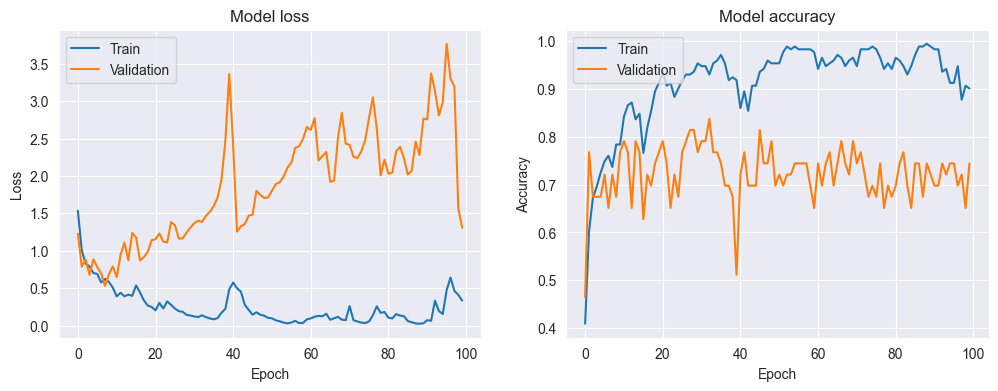

In [42]:
visualize_model(history)
metrics = save_metrics(6, history)
all_metrics.update(metrics)

# # Try 8
lr = 0.01

Layer 0: 10 sigmoid
Layer 1: 3 softmax

In [44]:
model = Sequential([
    Input(shape=(x_train.shape[1],)),
    Dense(10, activation='sigmoid'),
    Dense(7, activation='softmax'),
])

In [45]:
model, history = compile_and_train_model(model, x_train, y_train, x_test, y_test, initial_lr=0.01)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.2413 - f1_score: 0.1087 - loss: 1.8695 - val_accuracy: 0.3023 - val_f1_score: 0.1095 - val_loss: 1.7089
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2746 - f1_score: 0.0633 - loss: 1.6230 - val_accuracy: 0.3488 - val_f1_score: 0.1409 - val_loss: 1.5715
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3701 - f1_score: 0.0928 - loss: 1.4340 - val_accuracy: 0.3953 - val_f1_score: 0.1417 - val_loss: 1.4978
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4410 - f1_score: 0.1212 - loss: 1.3346 - val_accuracy: 0.4884 - val_f1_score: 0.2113 - val_loss: 1.4322
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5532 - f1_score: 0.1983 - loss: 1.2731 - val_accuracy: 0.6279 - val_f1_score: 0.3251 - val_loss: 1.3696
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5514 - f1_score: 0.2861 - loss: 1.3211 - val_accuracy: 0.6279 - val_f1_score: 0.3239 - val_loss:

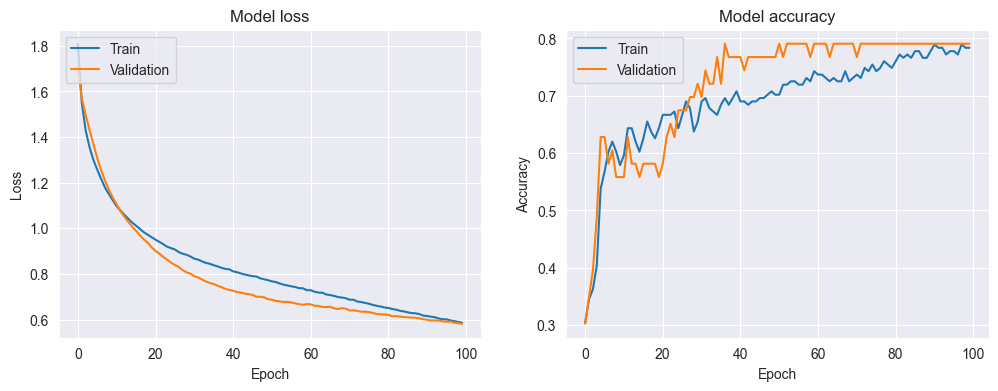

In [46]:
visualize_model(history)
metrics = save_metrics(7, history)
all_metrics.update(metrics)

# Try 9
lr = 0.01

Layer 0: 10 tanh
Layer 1: 3 softmax

In [48]:
model = Sequential([
    Input(shape=(x_train.shape[1],)),
    Dense(10, activation='tanh'),
    Dense(7, activation='softmax'),
])

In [49]:
model, history = compile_and_train_model(model, x_train, y_train, x_test, y_test, initial_lr=0.01)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - accuracy: 0.1688 - f1_score: 0.0891 - loss: 1.8660 - val_accuracy: 0.2791 - val_f1_score: 0.2066 - val_loss: 1.6546
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3665 - f1_score: 0.1628 - loss: 1.5764 - val_accuracy: 0.6279 - val_f1_score: 0.4834 - val_loss: 1.3811
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5350 - f1_score: 0.3591 - loss: 1.3681 - val_accuracy: 0.6512 - val_f1_score: 0.4920 - val_loss: 1.1879
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5638 - f1_score: 0.3527 - loss: 1.1968 - val_accuracy: 0.6279 - val_f1_score: 0.4875 - val_loss: 1.0592
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6110 - f1_score: 0.4375 - loss: 1.0948 - val_accuracy: 0.6279 - val_f1_score: 0.4858 - val_loss: 0.9648
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5995 - f1_score: 0.3753 - loss: 1.0964 - val_accuracy: 0.5814 - val_f1_score: 0.4625 - val_loss:

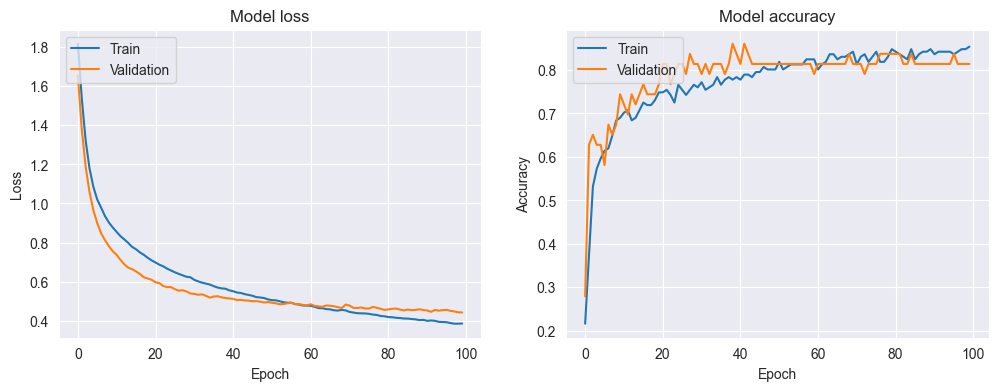

In [50]:
visualize_model(history)
metrics = save_metrics(8, history)
all_metrics.update(metrics)

# Analisys

In [52]:
def print_best_metrics(all_metrics):
    for model_name, metrics in all_metrics.items():
        best_val_acc = max(metrics['val_accuracy'])
        best_epoch = metrics['val_accuracy'].index(best_val_acc) + 1
        print(f"{model_name}: Best val accuracy = {best_val_acc:.4f} at epoch {best_epoch}")

        if metrics['val_f1_score']:
            last_epoch_f1 = metrics['val_f1_score'][-1]
            avg_f1 = sum(last_epoch_f1) / len(last_epoch_f1)
            print(f"{model_name}: Average val F1 at last epoch = {avg_f1:.4f}")

print_best_metrics(all_metrics)

model_0: Best val accuracy = 0.7674 at epoch 4
model_0: Average val F1 at last epoch = 0.5231
model_1: Best val accuracy = 0.7907 at epoch 9
model_1: Average val F1 at last epoch = 0.4967
model_2: Best val accuracy = 0.7442 at epoch 6
model_2: Average val F1 at last epoch = 0.5376
model_3: Best val accuracy = 0.5814 at epoch 84
model_3: Average val F1 at last epoch = 0.4294
model_4: Best val accuracy = 0.6512 at epoch 71
model_4: Average val F1 at last epoch = 0.3039
model_5: Best val accuracy = 0.8140 at epoch 49
model_5: Average val F1 at last epoch = 0.6345
model_6: Best val accuracy = 0.8372 at epoch 33
model_6: Average val F1 at last epoch = 0.5889
model_7: Best val accuracy = 0.7907 at epoch 37
model_7: Average val F1 at last epoch = 0.5869
model_8: Best val accuracy = 0.8605 at epoch 39
model_8: Average val F1 at last epoch = 0.6748


In [53]:
def get_best_models_by_metrics_smooth(metrics_dict, last_n=100):
    best_models = {}

    for metric in ['val_accuracy', 'val_f1_score', 'val_loss']:
        best_model = None
        best_value = float('-inf') if metric != 'val_loss' else float('inf')

        for model_name, metrics in metrics_dict.items():
            raw_values = metrics.get(metric, [])
            if len(raw_values) < last_n:
                continue

            values = []
            for v in raw_values:
                if hasattr(v, 'numpy'):
                    scalar = v.numpy()
                    if hasattr(scalar, 'shape'):
                        if scalar.shape == ():
                            scalar_value = float(scalar)
                        elif scalar.size == 1:
                            scalar_value = float(scalar.item())
                        else:
                            scalar_value = float(scalar.mean())
                    else:
                        scalar_value = float(scalar)
                    values.append(scalar_value)
                else:
                    values.append(float(v))

            avg_value = sum(values[-last_n:]) / last_n

            if ((metric != 'val_loss' and avg_value > best_value) or
                (metric == 'val_loss' and avg_value < best_value)):
                best_value = avg_value
                best_model = model_name

        best_models[metric] = (best_model, best_value)

    return best_models


In [54]:
best_models = get_best_models_by_metrics_smooth(all_metrics)

for metric, (model, value) in best_models.items():
    metric_name = metric.replace('val_', '').upper()
    model_num = int(model.split('_')[1])
    print(f"Найкраща модель за {metric_name}: модель {model_num + 1} з результатом {value:.4f}")



Найкраща модель за ACCURACY: модель 9 з результатом 0.7881
Найкраща модель за F1_SCORE: модель 9 з результатом 0.6442
Найкраща модель за LOSS: модель 9 з результатом 0.5624
